In [737]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

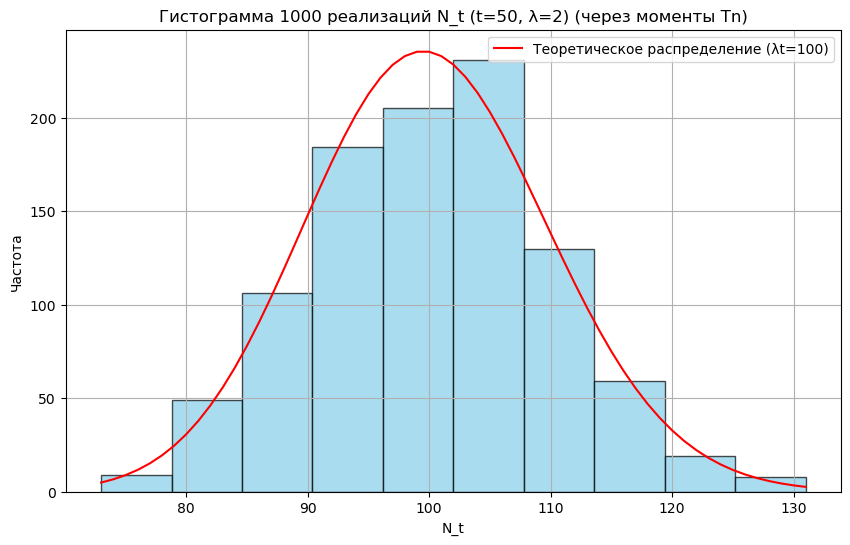

In [739]:
# 1. Реализовать 1000 случайных величин Nt при фиксированном значении
# t =50, =2

np.random.seed(1)
t = 50   # Время
lambda_ = 2    # Интенсивность
size = 1000  # Количество реализаций

# Моделирование через моменты Tn
def moment_times(t, lambda_, size):
    realizations = []
    for l in range(size):
        T_sum = 0
        count = 0
        while True:
            # Генерация промежутка времени (экспоненциальное распределение)
            thau = np.random.exponential(1/lambda_)
            T_sum += thau
            if T_sum > t:
                break
            count += 1
        realizations.append(count)
    return np.array(realizations)

# Генерация 1000 реализаций
Nt = moment_times(t, lambda_, size)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(Nt, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f"Гистограмма 1000 реализаций N_t (t={t}, λ={lambda_}) (через моменты Tn)")
plt.xlabel("N_t")
plt.ylabel("Частота")

# 2 Построить гистограмму реализованной последовательности и наложить
# на гистограмму график (13);
lambda_t = lambda_ * t
k_values = np.arange(min(Nt), max(Nt)+1) # берем все целые числа между максимальным и минимальным + 1 N_t
teor_size = 1000*len(k_values)/10 # масштабирование наблюдений так как количество точек len(k_values)
poisson_probs = poisson.pmf(k_values, mu=lambda_t) # из функции распределения получаем вероятности

# Построение распределения, масштаировал получив теоретические частоты
plt.plot(k_values, poisson_probs*teor_size, color='red', label=f"Теоретическое распределение (λt={lambda_t})")
plt.grid()
plt.legend()
plt.show()

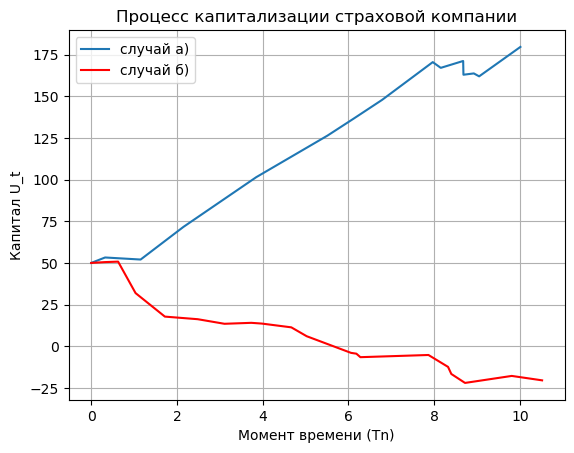

In [743]:
# 3. Реализовать процесс (12) до фиксированного момента времени tmax и
# построить его график. Предполагаем, что страховые выплаты Xi рас
# пределены по экспоненциальному закону с параметром равным 1 т.е.
# Xi ∼exp(1 ) (следовательно, EXi = ). Рассмотрим 2 случая:

# Моделирование капитала компании
def u_times(t_max, lambda_, lambda_mu, c, U0):
    U_realizations = []
    T_n = []
    U_realizations.append(U0)
    T_n.append(0)
    T_sum = 0
    count = 0
    while T_sum < t_max:
        # Генерация промежутка времени (экспоненциальное распределение)
        thau_n = np.random.exponential(1/lambda_)
        T_sum += thau_n
        X_n = np.random.exponential(lambda_mu)
        U_realizations.append(U_realizations[count] + c*thau_n - X_n)
        T_n.append(T_sum)
        count += 1
    return [np.array(T_n), np.array(U_realizations)]

# условие 15 выполнено
res_yes = u_times(10, 2, 5, 20, 50)
# условие 15 не выполнено
res_no = u_times(10, 2, 5, 4, 50)

plt.plot(res_yes[0] ,res_yes[1], label = "случай a)")
plt.plot(res_no[0] ,res_no[1], color="red", label = "случай б)")
plt.title(f"Процесс капитализации страховой компании")
plt.xlabel("Момент времени (Tn)")
plt.ylabel("Капитал U_t")
plt.grid(True)
plt.legend()
plt.show()

Компания не разорилась
сумма индикаторов разорения X_Ai 0
оценка вероятности разорения  0.0
теоретическая вероятность разорения: Ψ(u) <= 0.035673993347252374
При замене Ψ(u) на ее оценку Ψ^(u)=0.0 условие Ψ^(u) <= 0.035673993347252374 выполняется


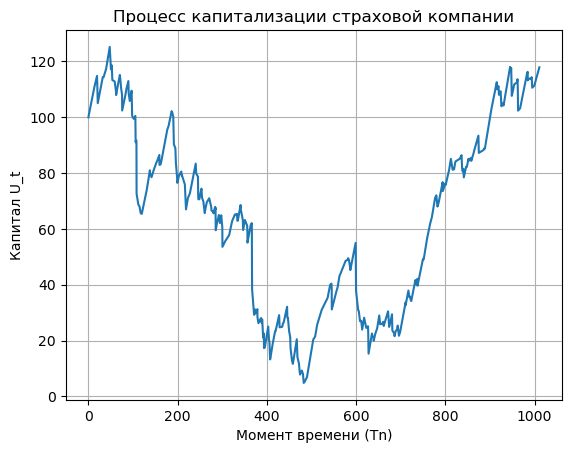

In [745]:
# 4. Рассчитать выборочную вероятность разорения фирмы при следующих
# значениях параметров: tmax = 1000, c = 1, lambda_ = 0.3, mu = 3, U0 = 100, по
# формул

c = 1
lambda_ = 0.3
mu = 3
U0 = 100
t_MAX = 1000

result = u_times(t_MAX, lambda_, mu, c, U0)
# оценка вероятности разорения
U_t = result[1]

if (X_Ai > 0):
    for t in range(len(U_t)):
        if (U_t[t] < 0):
            print("компания разорилась на моменте времени ", result[0][t])
            break
else:
    print("Компания не разорилась")

X_Ai_sum = len(U_t[U_t < 0])
print("сумма индикаторов разорения X_Ai", X_Ai_sum)

psi_hat = X_Ai_sum/t_MAX
print("оценка вероятности разорения ",psi_hat)

ro = c/(lambda_*mu) - 1
psi_sup = np.exp((-1/mu)*(ro/(1+ro))*U0)

print(f"теоретическая вероятность разорения: Ψ(u) <= {psi_sup}")
print(f"При замене Ψ(u) на ее оценку Ψ^(u)={psi_hat} условие Ψ^(u) <= {psi_sup} выполняется")

plt.plot(result[0] ,U_t)
plt.title(f"Процесс капитализации страховой компании")
plt.xlabel("Момент времени (Tn)")
plt.ylabel("Капитал U_t")
plt.grid(True)
plt.show()